<a href="https://colab.research.google.com/github/abhinavanagarajan/election/blob/main/oil_spill_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/abhinavanagarajan/election/main/oilspilldataset.csv')
df


,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize,SpillCond
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [25]:
y=df['SpillCond']
y

,SpillCond
0,1
1,0
2,1
3,1
4,0
...,...
932,0
933,0
934,0
935,0


In [26]:
x=df.drop('SpillCond',axis=1)
x

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [28]:
x_train

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
710,63,15,114.20,623.27,172,121500.0,74.27,9.33,1191.0,0.13,...,73,636.40,180.00,90.00,73.48,7.07,0,3249.90,66.20,6.20
779,47,16,226.81,287.06,73,129600.0,47.81,5.01,1461.0,0.10,...,50,742.16,90.00,67.50,41.66,10.99,1,7894.38,65.80,6.89
174,166,99,1708.19,1232.37,146,247500.0,36.68,8.16,2910.0,0.22,...,55,651.92,430.12,295.52,99.67,2.21,0,4056.61,66.17,8.01
405,138,130,1355.46,1068.25,91,325000.0,37.44,8.13,2990.0,0.22,...,63,900.00,550.00,305.56,136.00,2.95,0,5486.65,66.01,7.59
796,64,12,18.25,389.17,60,97200.0,48.25,7.64,1138.0,0.16,...,50,649.00,127.28,21.21,51.96,30.59,1,2338.89,65.85,6.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,123,12,116.33,377.75,59,97200.0,52.42,4.44,1011.0,0.09,...,50,524.79,127.28,25.46,56.92,20.62,0,2475.04,65.88,6.45
871,139,14,37.57,304.43,35,113400.0,55.07,7.22,1011.0,0.13,...,50,402.49,254.56,63.64,127.28,6.32,0,2963.85,65.75,6.28
835,103,37,4.49,655.24,93,299700.0,55.32,16.66,2059.0,0.30,...,50,630.00,540.00,321.43,193.43,1.96,0,5838.04,66.20,5.81
792,60,20,28.95,373.35,56,162000.0,51.50,6.68,1477.0,0.13,...,50,649.00,127.28,106.07,51.96,6.12,1,2183.46,65.84,6.18


In [29]:
x_test

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
143,133,50,1687.60,1498.74,9,125000.0,37.34,7.30,1980.0,0.20,...,55,509.90,304.14,207.43,66.43,2.46,0,3423.55,66.30,7.89
229,76,76,1010.70,741.46,84,190000.0,31.83,5.22,2880.0,0.16,...,39,1154.34,304.14,115.40,80.83,10.00,0,5442.91,65.81,7.32
116,106,116,780.74,1650.50,106,290000.0,36.33,9.36,3380.0,0.26,...,55,1298.08,316.23,175.10,86.84,7.41,0,11823.49,66.25,6.76
134,124,62,1697.23,1330.31,28,155000.0,37.00,7.42,2180.0,0.20,...,55,670.82,335.41,117.61,100.69,5.70,0,4148.59,66.22,7.96
596,28,31,278.06,221.13,142,251100.0,46.42,13.41,2276.0,0.29,...,67,1026.16,254.56,70.71,92.47,14.51,0,13758.25,65.73,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,188,68,1682.62,1640.74,29,170000.0,35.82,8.77,1720.0,0.24,...,55,583.10,360.56,206.33,92.35,2.83,0,3298.60,66.37,7.84
402,135,51,1030.63,992.47,53,127500.0,37.31,7.82,1730.0,0.21,...,63,570.09,360.56,170.14,122.20,3.35,0,2874.53,65.93,7.25
10,11,59,1127.41,1507.76,42,147500.0,47.59,4.72,1800.0,0.10,...,69,707.11,212.13,120.21,47.73,5.88,0,55128.46,66.18,7.18
422,170,115,876.38,1151.03,61,287500.0,40.81,6.56,2950.0,0.16,...,63,806.23,471.70,265.07,109.67,3.04,0,3382.40,65.98,7.03


In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_lr_train_pred=model.predict(x_train)
y_lr_test_pred=model.predict(x_test)

In [32]:
y_lr_train_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
y_lr_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 0.0
LR R2 (Train): 1.0
LR MSE (Test): 0.0425531914893617
LR R2 (Test): 0.06641837368094339


In [35]:
lr_results=pd.DataFrame(['Logistic Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']

In [36]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Logistic Regression,0.0,1.0,0.042553,0.066418


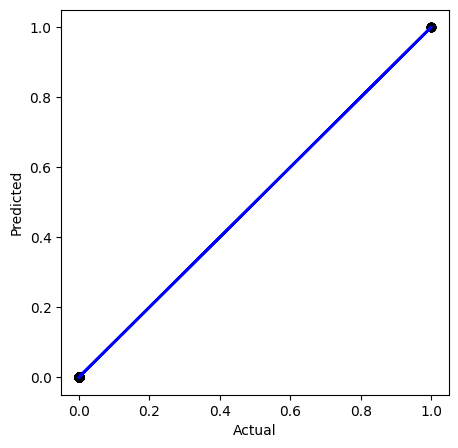

In [37]:
import matplotlib.pyplot as plt
import numpy as mp

plt.figure(figsize=(5,5))
plt.scatter(y_train,y_lr_train_pred,c='black',alpha=0.3)
plt.plot(y_train,y_train,c='blue',linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [68]:
l=[2,22325,79.11,841.03,180,55812500,51.11,1.21,61900,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.3,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0,0,0,0,704,40140,0,68.65,89,69,5750,11500,9593.48,1648.8,0.6,0,51572.04,65.73,6.26,0]
print(len(l))
import random
outp=[]
for ea in range(5):
    k=[]
    for i in range(len(l)-1):
        if (type(l[i]) == int):
            k.append(l[i]+random.randint(0,9))
        else:
            k.append(round(l[i]+random.random(),3))
    outp.append(k)
outp.append([4,1201,1562.53,295.65,66,3002500,42.4,7.97,18030,0.19,166.5,0.21,0.26,0.48,0.1,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.2,0,2.2,183,10080,0,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07])

50


In [69]:
input_data = pd.DataFrame(outp,columns=['Course', 'Speed', 'Heading', 'RateofTurn', 'PositionAccuracy', 'SOG', 'Latitude', 'Longitude', 'COG', 'AISType', 'NavigationalStatus', 'IMOMessage', 'Timestamp', 'Date', 'WeatherConditions', 'DistanceTraveled', 'TimeToDestination', 'DeviationfromCourse', 'VesselTrafficDensity', 'VesselCollisions', 'VesselEncounters', 'PortTraffic', 'VesselSpeedViolations', 'VesselTracking', 'VesselIdentification', 'VesselClassification', 'VesselBehaviorAnalysis', 'VesselSafety', 'VesselSecurity', 'VesselEfficiency', 'VesselEmissions', 'VesselFuelConsumption', 'VesselMaintenance', 'VesselInsurance', 'VesselFinancing', 'VesselValuation', 'VesselOwnership', 'VesselDisplacement', 'VesselDeadweight', 'VesselGrossTonnage', 'VesselNetTonnage', 'VesselDraft', 'VesselBeam', 'VesselLength', 'VesselHeight', 'VesselEnginePower', 'VesselFuelCapacity', 'VesselCargoCapacity', 'VesselCrewSize'])

predictions = model.predict(input_data)

# Print the prediction
print(predictions)

[0 0 0 0 0 1]
